In [1]:
import torch
import torch.nn
# import torch.nn.functional as F
# from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display

# 生成数据

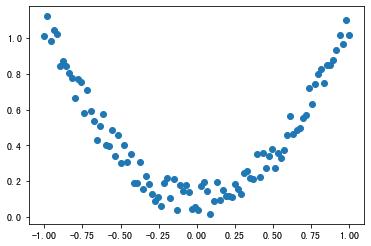

In [8]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # 增加一维
y = x.pow(2) + torch.rand(x.size()) * 0.2
plt.scatter(x.numpy(), y.numpy())  # 可以使用.detach()代替之前的.data
plt.show()

# 构建神经网络

In [3]:
class Net(torch.nn.Module):  #继承
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  #从特征到隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)  #从隐藏层到输出

    def forward(self, x):
        x = torch.relu(self.hidden(x))  #激活函数
        x = self.predict(x)  #预测值
        return x

In [4]:
net = Net(1, 10, 1)
net.state_dict() # 查看参数

OrderedDict([('hidden.weight',
              tensor([[ 0.3099],
                      [ 0.3989],
                      [ 0.5522],
                      [ 0.9987],
                      [ 0.7852],
                      [-0.4627],
                      [-0.6062],
                      [ 0.4419],
                      [ 0.1478],
                      [-0.8500]])),
             ('hidden.bias',
              tensor([ 0.5560,  0.2881, -0.0570, -0.4500,  0.8768, -0.7093, -0.4935,  0.6256,
                       0.6919,  0.2682])),
             ('predict.weight',
              tensor([[-0.2584, -0.2647, -0.0671, -0.1982, -0.2179,  0.1353, -0.0584, -0.0260,
                       -0.2803,  0.2349]])),
             ('predict.bias', tensor([0.1880]))])

# 损失函数

In [5]:
optimzer = torch.optim.SGD(net.parameters(), lr=0.5)  #设置学习率为0.5,
loss_func = torch.nn.MSELoss()

# 开始训练 

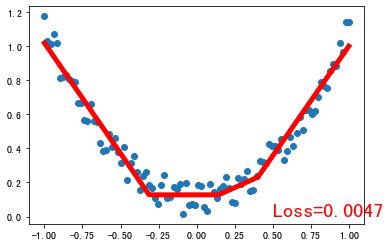

In [6]:
plt.ion()
for t in range(1, 201):  #训练200次
    prediction = net(x)  #得到预测值
    loss = loss_func(prediction, y)  #通过损失函数得到损失
    optimzer.zero_grad()  #梯度设置为0
    loss.backward()  #反向传播
    optimzer.step()
    if t % 10 == 0:
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.numpy(), 'r-', lw=5)
        plt.text(0.5,
                 0,
                 'Loss=%.4f' % loss.item(),
                 fontdict={
                     'size': 20,
                     'color': 'red'
                 })
        plt.pause(0.1)
        display.clear_output(wait=True)  # 实现jupyter动态图
plt.ioff()
plt.show()